# Bird Song Audio Signal Analysis

### Table of contents:
- Introduction

- Fourier Analysis

- Working with piano notes and building a database

- Recognising bird songs

- Limitations and extensions

- Conclusions

- References

## Introduction

**We are using Librosa, a package not included within CoCalc, for audio signal processing. To install Librosa on Python, the following command must be run in the CoCalc terminal:** ```pip install librosa```



Birdwatching, or ‘twitching’, is a common hobby which involves observing and identifying different species of birds. One way to identify a species of bird is to listen to its vocalisations. These are sounds produced by birds as a form of communication. These may be to attract a mate, establish territory or even to signal alarm. Bird vocalisations are produced by the ‘sound-producing organ; called the syrinx’[1]. Each species of bird can produce a unique call due to the complicated superposition of sound waves of different frequency and amplitude created by their syrinx. The melodious songs produced served as inspiration for our project, in which we tasked ourselves with the identification of birds from a recording of their respective song using Python.

From the outset, we acknowledged that this is a challenging goal for our level of experience, and so we set out to use Python to create an algorithm capable of completing a Fast Fourier Transform on simple audio files. We found that the output from these transforms was particularly useful for analysing properties associated with sound frequency. In recognition of the complexity of our task, we decided that it would be more appropriate to determine whether manipulations of frequency data from recordings of bird songs had the potential to be used to identify birds. After refocusing our aim, we considered ways that we could reach a conclusion and set ourselves a goal of producing a database containing different species of bird and frequency properties of their respective bird song. In attempt to get an idea of how this database could function, we began working on a simpler database constructed of piano notes and their dominant frequencies. Using the knowledge gained from this, we then began working towards our overall goal of creating the bird database.

## Fourier Analysis

### Introduction to Fourier Analysis and the Fourier transform

Fourier Analysis is a topic in mathematics which explores how functions can be approximated or expanded in terms of the trigonometric functions $\sin$ and $\cos$. The Fourier transform 

$\hat f : \mathbb R \to \mathbb C $ of a continuous function or signal $f(t)$ is defined as: $$\hat f(k) := \int_{- \infty}^{+\infty} f(t) e^{-2 \pi i t k} dk $$

It converts the signal from the *time domain* to the *frequency domain*, allowing us to see the different frequencies present in the signal and their respective power. Indeed, the Fourier transform is a very powerful tool in audio signal processing and has many applications in industry. We intend on using the Fourier transform to extract some key frequencies present in the bird song recordings that could help us identify the species. 

**We have encountered multiple warnings whilst using the Librosa library, but they did not affect our output. The code below removes the different warnings produced:**

In [1]:
import warnings
warnings.filterwarnings("ignore") # To remove warnings

In order to analyse the audio signal, we employed the use of the Fourier transform to find the most powerful or 'dominant' frequencies in the signal. If the dominant frequency of a bird song differs between species of birds, the information gained by applying the Fourier transform may help identify a species from its song.

Sounds can be created from the superposition of many sine waves with different frequencies. For example, below a sound wave made from 4 different superimposed sine waves is plotted in the time domain.

<!-- ![](Images//super_time_domain.png) -->
<img src="Images//super_time_domain.png" alt="supertimedom" style="width: 800px;"/>

The Fourier transform will convert this signal to the frequency domain. This allows us to find the specific frequencies of the individual sine waves that were superimposed to form the sound wave.

<!-- ![](Images//superposition_freq_domain.png) -->
<img src="Images//superposition_freq_domain.png" alt="wrenfreqdom" style="width: 800px;"/>

From this plot we can see that our sound was created by sine waves with frequencies around: 400Hz, 2000Hz, 2500Hz and 4000Hz. The peak with the greatest height (greatest power) will tell us the position of the dominant frequency for the sound. In this particular case the frequencies at 400Hz, 2000Hz and 2500Hz are all equally dominant.



## Recognising Piano Notes

As piano notes consist of specific frequencies, we considered this a good place to start applying our code to real life sounds. We wanted to create a function to identify the notes being played based on the dominant frequency. The ideas we developed doing this were a stepping stone towards identifying bird species from bird song using a database.

To do this we first created a database of each note that can be played on the piano and its corresponding frequency.


<!-- ![](Images//frequencies_notes.png) -->
<img src="Images//frequencies_notes.png" alt="notes" style="width: 400px;"/>

If we perform a Fourier transform on the audio signal of a note being played on the piano, the most dominant frequency should be equal to the frequency corresponding to that note. Therefore, in order to identify which note is being played, the dominant frequency is located on the table and the corresponding note is found.

To be able to do this for any audio signal we created a function `dominant_freq_extractor(audio_file,n)` which analayses the audio file and returns the n most dominant frequencies for that signal.

Below, we test this on an audio recording of someone playing the piano note E in the 5th octave. From the output we can see that the dominant frequency is aorund 660Hz and comparing this to the table we can see that this does indeed correspond to the note E in the 5th octave. The slight difference between the dominant frequency and the frequency in the table may be due to tuning of the piano or inaccuracies in the audio recording.

In [2]:
import notes_identifier
import fourier_trans
dominant_frequency = fourier_trans.dominant_freq_extractor('Test Files//E_high_note.wav',1)
notes_identifier.get_note_info(dominant_frequency, corr = 3, get_nearest = True)

('660.1796407185628Hz', 'E', 5)

## Recognising Bird Songs:

We now want to apply what we had learnt from using the Fourier transform on piano notes and chords to bird songs. For our code, we used birdsong audio files downloaded from the online website Xeno Canto [2]. Bird song frequencies do not necessarily correspond to a note, so we cannot apply the exact method above in this situation. However, the Fourier transform can still supply us with a lot of useful information that could be used to differentiate one song from another.

For example, the `dominant_freq_extractor_string` function was applied to the song of a wren, which returned a dominant frequency of 7035Hz.

In [3]:
import fourier_trans
fourier_trans.dominant_freq_extractor_string('Database Files//Wren.wav', 1)

Dominant Frequency 1 : 7035.4165170878805


We tried the same function on two other wren song files, which gave quite different dominant frequencies:

In [4]:
import fourier_trans
fourier_trans.dominant_freq_extractor_string('Test Files//Wren 2.wav', 1)

Dominant Frequency 1 : 4583.846393034825


In [5]:
import fourier_trans
fourier_trans.dominant_freq_extractor_string('Test Files//wren3.wav', 1)

Dominant Frequency 1 : 5385.4664210704605


### Investigating how the dominant frequency of birdsong changes over time

After using the Fourier transform to analyse multiple recordings of birdsong from the same species, it became apparent that the dominant frequencies change considerably between songs of the same species. This may be due to a species having many different types of song for different purposes. Therefore, it was clear to us that the dominant frequency alone would not be enough to differentiate between species.

We decided to investigate how the frequency of a bird's song changes over time, as this could help identify the unique singing pattern of a species. This would also allow us to identify the minimum and maximum frequencies the bird sings at (its frequency range), which we thought may be more distinctive of a species than the dominant frequency alone.

To do this, we created a function, `freq_change(audiofile)`, that split audio files into 0.1s time chunks [3] and applied the Fourier transform to each of these chunks, returning the dominant frequency. The dominant frequencies per 0.1 second were appended to a list, `dom_f`. This made it relatively simple to identify the minimum, maximum and average frequency of the audio file. The function returns a list with the minimum, maximum and average frequencies as its output, as the code below shows:

In [6]:
import librosa
import librosa.display
import numpy as np
from scipy.fft import fft, fftfreq
from pydub import AudioSegment



def freq_change(audiofile):

    dom_f = []
    time = []
    #sr represents the sample rate
    audio, sr = librosa.load(audiofile)

    #get number of samples for 0.1 seconds
    buffer = 0.1 * sr

    samples_total = len(audio)
    samples_wrote = 0
    counter = 1

    while samples_wrote < samples_total:
        #check if the buffer is not exceeding total samples
        if buffer > (samples_total - samples_wrote):
            buffer = samples_total - samples_wrote

        #create a 0.1 second block of the audio data
        block = audio[int(samples_wrote) : int((samples_wrote + buffer))]

        #perform a FFT to find the dominant frequency per 0.1 second
        N = len(block)
        #power in db is the modulus of the fourier transform ^2 as certain elements in the array are complex
        yf = np.abs(fft(block))**2
        #create a frequency vector
        xf = fftfreq(N, 1 / sr)
        #find the dominant frequency
        maxpower = np.argmax(yf)
        strongfreq = xf[maxpower]

        dom_f.append(strongfreq)
        time.append(0.1*counter)

        counter += 1
        samples_wrote += buffer

    x = []
    #filtering out frequencies below 20 Hz as this is below the human range of hearing
    if min(dom_f) < 20:
        while min(dom_f) < 20:
            dom_f.remove(min(dom_f))
    x.append(min(dom_f))
    x.append(max(dom_f))
    x.append(sum(dom_f)/len(dom_f))
    #x is a list containing the minimum, maximum and average frequency
    return x

#testing the code on a wood pigeon bird song
freq_change('Database Files//Wood pigeon.wav')

[140.0, 930.0, 414.3907445418921]

To visualise the frequency changes, we also extended the function to write another function `freq_graph(audiofile)` which can plot the dominant frequency per 0.1s against time:

<!-- ![](Images//pigeongraphfinal.png) -->
<img src="Images//pigeongraphfinal.png" alt="pigeon" style="width: 800px;"/>

### Creating a database of 10 common bird species

At this point, we had a way to extract the dominant, minimum, maximum and average frequency for a bird's song. After comparing the graphs of dominant frequency over time (an example is shown above) of different bird species, we saw that there were some clear differences in the frequency range and pattern of frequencies, while those of the same species had similarities in their graphs. Therefore, we thought that using these additional parameters could help to more accurately identify the bird species than dominant frequency alone. We started to create a database of bird species using these four parameters.

Ten common bird species were chosen and these are shown below:

* Blue Tit
* Common Chaffinch
* House Sparrow
* European Robin
* Blackbird
* Wren
* Common Starling
* Wood Pigeon
* Song Thrush
* Great Tit

<!-- ![](Images//Reference Table.png) -->
<img src="Images//Reference Table.png" alt="table" style="width: 700px;"/>

### Comparing dominant frequency, minimum and maximum, and average frequency

Having created a database containing the dominant frequency, minimum and maximum frequencies and average frequency for the songs of the 10 different species, we needed a way to compare them. Given an audio recording of a bird song from an unknown species, we wanted to to create a function (`closest_species`) that returned the species with a song most similar to that in the audio recording.

To do this we first calculated the dominant, minimum, maximum and average frequency for the unknown bird song. For example,


|Parameter|Frequency (Hz)|
|---|---|
|Dominant frequency|4584|
|Maximum frequency|8310|
|Minimum frequency|60|
|Average frequency|2850|

Each of these parameters is then compared to the same parameter in the database and the average difference between the recording parameters and the database parameters is calculated for each species. The minimum of the differences is found and the species this difference corresponds to is outputted as the predicted species for this bird song.

Here we test the code on an audio recording of a wood pigeon song ("Wood Pigeon 2"), a different one to the one used to create the database.

In [7]:
import which_species
which_species.closest_species('Test Files//Wood Pigeon 2.wav')

The song is the song of a Wood pigeon


As we can see the function correctly determined that the audio recording is likely to be the song of a wood pigeon.

However, other species of birds can have very similar songs containing similar frequencies. Let's test the code on an audio recording of a wren's song, different to that used in the creation of the database.

In [8]:
import which_species
which_species.closest_species('Test Files//Wren 2.wav')

The song is the song of a Great tit


Here we can see that the function incorrectly determined that the song was that of a great tit.

This is likely because a lot of bird species will have similar dominant, minimum, maximum and average frequencies of their songs, making it hard for the function to correctly identify the correct species. Furthermore, a species of bird will have different types of calls for different purposes, which will likely differ greatly in frequency. Therefore, to account for this more parameters may need to be used or the different types of call may need to be added into the database.

## Limitations and Extensions

Although we managed to make some progress with our goal of identifying birds from their song, our current programme has many limitations.
Bird songs are very sophisticated and are therefore difficult to identify with the characteristics that we were able to extract. Ideally our database would allow for comparison between patterns of frequencies produced and the length of single 'verse' of a bird's song. However, we were unable to extract this information from our audio files during this project due to the complexity of the code required.  


A further limitation is that our code would only be able to identify birds that have had their characteristics inputted into the database. Currently our database is very small, and our programme is therefore not capable of identifying many birds. The database could be extended using a webscraping algorithm that can extract the bird song audiofiles from a website, which is a much more efficient way of gathering the copious amounts of data required for this task. This classification problem could also be solved with more advanced methods such as supervised learning, which builds a predictive model based on training data. For example, the algorithm could take as input the raw audiofile of the bird song and map it to a probability of it belonging to a certain bird species.
Furthermore, each species of bird is able to make different sounds to communicate different things, such as signaling distress or finding a mate. Our current approach would misidentify a bird if it were making a sound that we had not encountered. This could also be addressed by extending the database to include the alarm call and song of each of the birds.


Another issue that we wished to tackle was background noises which make bird identification more difficult. Birds produce their vocalisations in loud, natural environments meaning that other sounds are often captured during their songs and also during pauses between songs. One possible way of filtering out sounds during pauses would be to add a decibel threshold value below which sounds are ignored by the software.   We considered ways of minimising the contribution of this noise such as removing frequencies below the range. 

Finally, solely using frequency to identify birds is disadvantageous as most birds emit sounds within the 1kHz - 8kHz [4] , which is a narrow range given that the human ear can perceive sounds between 20Hz-20kHz.



### Future extensions: Using PCA
As described in previous sections, finding the different characteristics of bird songs is an extremely complicated task. Many factors need to be considered and compared while doing bird song analysis, therefore it is useful if we can find methods to take account into all characteristics for a more accurate prediction. Hence, a preliminary attempt of identifying bird songs has been made using Principal Component Analysis (PCA) [5]. It shows the different correlations of various characteristic data being fed in, by converting them to points on a 2D graph. The more correlated the data is, the more clustered the points are on such graphs. Note that the algorithms behind PCA will not be discussed as they are not the main focus of this report. We hope that this section will provide more insight and ideas for future work.

#### Method

The method used in this section is very different to the methods used in previous sections. Firstly, we "cleanse" the birdsong audio file by making them the same duration (30 seconds). Audio files shorter than this duration will be incremented with silence to fit such duration (padding); for audio files longer than this duration, we will take only the first 30 seconds of it (cutting). Then we split them into equal parts and run a fourier transform of each of the split audio files as before. The real parts of the output are being put into a database, as well as their respective audio sources. Next, we create a function `get_PCA(mode)` to run a PCA analysis on the database. Functions for such analysis are provided in the Scikit-Learn Python library [6]. Lastly, we plot the results.

Below is an example of a PCA plot of 3 different flowers taken from an example from the scikit-learn documentation [7]. We can clearly see that the data for the same type of flower is clustered together, as indicated by the colors.

<img src="Images//sphx_glr_plot_incremental_pca_001.png" alt="egPCA" style="width: 600px" />
<!-- <img src="Images//tsne_example.png" alt="egTSNE" style="width: 340px;"> -->

With reference to this, we would also expect data points for the split birdsong audios clustering similarly.

Below is an attempt of using PCA on our audio files. Here we created a function `analyse_PCA_birds` to analyse and plot the data. 
(We have included also a function to delete folders "splits" and "cleaned" generated. To prevent deleting important folders in case of an error: **Please input Y into the following input boxes**)



Are you sure you want to delete /home/user/Assessments/NSCI0007_Group_Project/splits? Y/N Y

Are you sure you want to delete /home/user/Assessments/NSCI0007_Group_Project/cleaned? Y/N Y

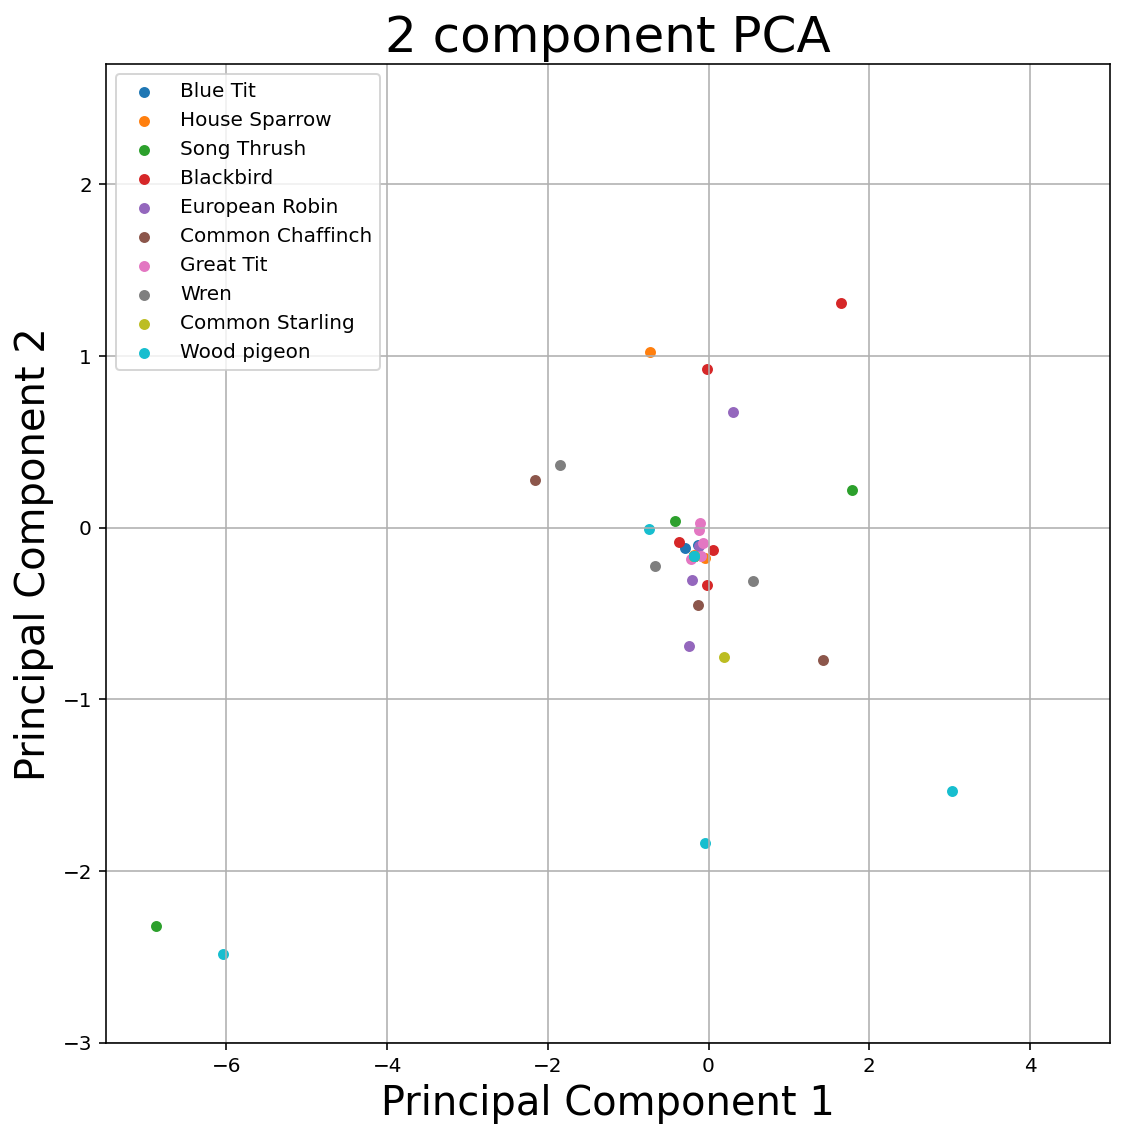

In [9]:
import PCA_Analysis as PA
PA.analyse_PCA_birds(num = 10, rmv = True, length = 30, parts = 6, mode = 'PCA')

#### Results
The graphs below show the result of the analysis using the PCA. Note that the colors indicating different bird species may vary for each output.

<img src="Images//analyse_PCA.png" alt="PCA" style="width: 610px;"/>
<!-- <img src="Images//TSNE-Analysis.png" alt="TSNE" style="width: 540px;"/> -->

As seen from the above, the points representing the different species of birds are largely overlapped and exhibit no noticeable clustering differences. Using our current database of bird songs, it is not possible to identify different bird species using PCA. This further emphasises our limitations as discussed previously. In theory, better results can be obtained using PCA if we could collect large amounts of bird song data for the selected birds, with similar audio lengths, together with filtering of the background noises. We can also take into account the different parameters as discussed in previous sections, and maybe factors which are not yet considered.


## Conclusion

Throughout this project, we steadily became familiar with the Librosa Python library and its functionality. In particular, we utilised the Fourier Transform to gain insight into the nature of bird songs and sound in general. We quickly recognised the difficulty of the overall task and decided to work towards producing a database of frequency properties for different bird species. Through this process, we learned that analysing the frequencies of bird songs has limited usefulness in identifying a species, as many birds sing in similar frequency ranges, and may have a variety of calls which makes identification more complicated. For bird species with a very distinctive frequency range (e.g. the wood pigeon, which sings at a low frequency), our code was more successful in identifying the species, but in most other cases it was unsuccessful.

In conclusion, we managed to produce a database and develop code that is able to compare audio files to reference files within the database. Unfortunately, the frequency data that we were able to extract from the bird songs we worked with was simply not extensive enough to consistently identify birds. Our database can however be extended and refined in the future to overcome the complications identified throughout. Furthermore, future investigations for identifying bird species by vocalisation can be done using other analysis techniques, such as the proposed PCA method.


## References

[1] Boswall J., How birds sing, The British Library, https://www.bl.uk/the-language-of-birds/articles/how-birds-sing#authorBlock1

[2] Xeno Canto, https://www.xeno-canto.org

[3] Hendrik Schreiber, Split audio on timestamps Librosa, 2020, https://stackoverflow.com/questions/60105626/split-audio-on-timestamps-librosa

[4] All About Birds, Bird Songs Have Frequencies Higher Than Humans Can Hear?, 2009, https://www.allaboutbirds.org/news/do-bird-songs-have-frequencies-higher-than-humans-can-hear/

[5] Jolliffe Ian T. and Cadima Jorge, Principal component analysis: a review and recent developments, Phil. Trans. R. Soc. A.3742015020220150202, 2016,
http://doi.org/10.1098/rsta.2015.0202Do

[6] Pedregosa et al., sklearn.decomposition.PCA,Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830, 2011, https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

[7] Pedregosa et al., Incremental PCA ,Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830, 2011, https://scikit-learn.org/stable/auto_examples/decomposition/plot_incremental_pca.html#sphx-glr-auto-examples-decomposition-plot-incremental-pca-py
